# 과제: MNIST 데이터를 나만의 NN model로 95 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

- The MNIST databas (modified national institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

In [4]:
import tensorflow as tf

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

11493376/11490434 [==============================] - 2s 0us/step


## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [10]:
x_train.shape

(60000, 28, 28)

Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

In [12]:
# reshape the data for neural network model
x_train, x_test= x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

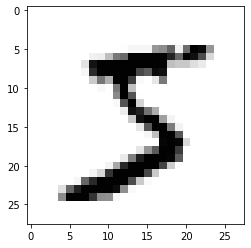

In [14]:
plt.imshow(x_train[0].reshape(28,28)).set_cmap('Greys')

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

In [15]:
y_train.shape

(60000,)

In [16]:
# show MNIST label for above data
y_train[0]

5

## 나만의 모델을 tensorflow keras API 를 이용해 만들어 봅시다~

* parameters for model

In [47]:
activation_list = ["sigmoid", "relu", "softmax", "tanh"]

loss_list = ["sparse_categorical_crossentropy",
             "categorical_crossentropy", 
             "binary_crossentropy"]

optimizer_list = ["sgd", "adam", "rmsprop", "adagrad"]

initializer_list = [tf.keras.initializers.RandomNormal(), 
                    tf.keras.initializers.RandomUniform(), 
                    tf.keras.initializers.he_normal(), 
                    tf.keras.initializers.he_uniform(), 
                    tf.keras.initializers.GlorotUniform(),
                    tf.keras.initializers.GlorotNormal()]

# dropout
dropout_rate = 0.3
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation = "sigmoid"),
    tf.keras.layers.Dense(2, activation = "sigmoid"),
    tf.keras.layers.Dropout(dropout_rate)
])


# regularizer
regularizer = tf.keras.regularizers.l1(1e-3)
regularizer = tf.keras.regularizers.l2(1e-3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          activity_regularizer=regularizer)
])

# weight initialization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          kernel_initializer=initializer_list[0])
])

#### My Own Model 

In [50]:
#### 자유롭게 Model을 만들고 compile 해봅시다 ####
model= tf.keras.Sequential()
model.add(tf.keras.layers.Dense(256, input_dim=784, activation ="relu"))
model.add(tf.keras.layers.Dense(10))

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

내가 만든 모델을 확인해 봅시다.

In [51]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_36 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


model을 자유롭게 train 해봅시다.  

In [62]:
history= model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0028 - sparse_categorical_accuracy: 0.9991
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0035 - sparse_categorical_accuracy: 0.9990
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0018 - sparse_categorical_accuracy: 0.9995
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0011 - sparse_categorical_accuracy: 0.9998
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0051 - sparse_categorical_accuracy: 0.9984
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0037 - sparse_categorical_accuracy: 0.9991
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0025 - sparse_categorical_accuracy: 0.9992
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0021 - sparse_categorical_accuracy: 0.9995
Epoch 9/10
1875/1875 [==========

In [59]:
def plot_history(history):
    plt.figure(figsize = (10,10))
    for e, (item, value) in enumerate(history.history.items()):
        plt.subplot(2,2,e+1)
        plt.plot(value)
        plt.title(item)
    plt.show()

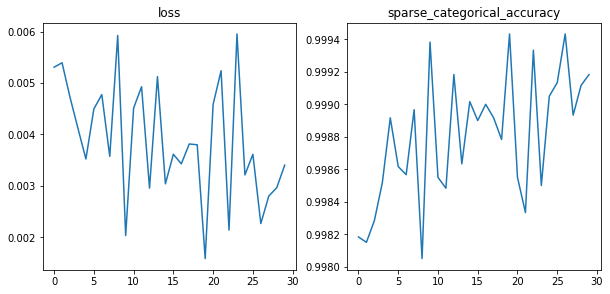

In [60]:
plot_history(history)

95%이상의 성능을 가진 모델을 만들면 완성!

In [61]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print('\nAccuracy:', test_acc)

313/313 - 1s - loss: 0.2023 - sparse_categorical_accuracy: 0.9788

Accuracy: 0.9787999987602234


![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)